# First Name:
# Last Name:

In [1]:
#import pandas & numpy
import pandas as pd
import numpy as np
import scipy.stats  #I usually keep scipy as scipy because you will need to access it libraries separately. 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in csv file into 
nesarc = pd.read_csv('nesarc.csv', low_memory=False) #increase efficiency
pd.set_option('display.float_format', lambda x:'%f'%x)

In [3]:
#setting variables you will be working with to numeric
nesarc['S3AQ3B1'] = pd.to_numeric(nesarc['S3AQ3B1']) #convert variable to numeric
nesarc['S3AQ3C1'] = pd.to_numeric(nesarc['S3AQ3C1']) #convert variable to numeric
nesarc['CHECK321'] = pd.to_numeric(nesarc['CHECK321']) #convert variable to numeric
nesarc['TAB12MDX'] = pd.to_numeric(nesarc['TAB12MDX']) #convert variable to numeric
nesarc['AGE'] = pd.to_numeric(nesarc['AGE']) #convert variable to numeric

In [4]:
#subset data to young adults age 18 to 25 who have smoked in the past 12 months
sub1=nesarc[(nesarc['AGE']>=18) & (nesarc['AGE']<=25) & (nesarc['CHECK321']==1)]

In [5]:
sub2=sub1.copy()

In [6]:
#SETTING MISSING DATA
sub2['S3AQ3B1']=sub2['S3AQ3B1'].replace(9, np.nan)
sub2['S3AQ3C1']=sub2['S3AQ3C1'].replace(99, np.nan)

In [7]:
#recoding number of days smoked in the past month
recode1 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub2['USFREQMO'] = sub2['S3AQ3B1'].map(recode1)

# contingency table of observed counts - between nicotine dependence (TAB12MDX) and smoking frequency  (USFREQMO)

In [8]:
ct1=pd.crosstab(sub2['TAB12MDX'], sub2['USFREQMO'])
print (ct1) 

USFREQMO  1.000000   2.500000   5.000000   14.000000  22.000000  30.000000
TAB12MDX                                                                  
0                64         53         69         59         41        521
1                 7         12         19         32         27        799


# contingency table of observed percentages - between nicotine dependence (TAB12MDX) and smoking frequency  (USFREQMO)

In [9]:
# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

USFREQMO  1.000000   2.500000   5.000000   14.000000  22.000000  30.000000
TAB12MDX                                                                  
0          0.901408   0.815385   0.784091   0.648352   0.602941   0.394697
1          0.098592   0.184615   0.215909   0.351648   0.397059   0.605303


# chi-square analysis between between nicotine dependence (TAB12MDX) and smoking frequency  (USFREQMO)

In [10]:
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

chi-square value, p value, expected counts
(165.27320708055845, 7.436364208390599e-34, 5, array([[ 33.64474457,  30.80152672,  41.70052848,  43.1221374 ,
         32.22313564, 625.50792719],
       [ 37.35525543,  34.19847328,  46.29947152,  47.8778626 ,
         35.77686436, 694.49207281]]))


# Bar plot to show relationship between between nicotine dependence (TAB12MDX) and smoking frequency  (USFREQMO)

C:\Users\jc790999\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(6.799999999999997, 0.5, 'Proportion Nicotine Dependent')

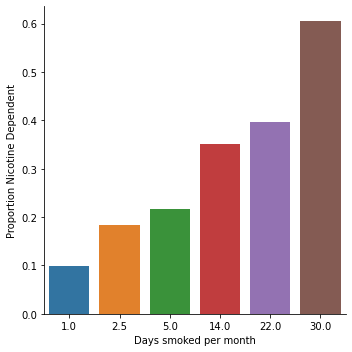

In [11]:
%matplotlib inline
sns.factorplot(x="USFREQMO", y="TAB12MDX", data=sub2, kind="bar", ci=None)
plt.xlabel('Days smoked per month')
plt.ylabel('Proportion Nicotine Dependent')

# Post-hoc analysis

In [12]:
recode2 = {1: 1, 2.5: 2.5}
sub2['COMP1v2']= sub2['USFREQMO'].map(recode2)

In [13]:
# contingency table of observed counts
ct2=pd.crosstab(sub2['TAB12MDX'], sub2['COMP1v2'])
print (ct2)

COMP1v2   1.000000  2.500000
TAB12MDX                    
0               64        53
1                7        12


In [14]:
# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

COMP1v2   1.000000  2.500000
TAB12MDX                    
0         0.901408  0.815385
1         0.098592  0.184615


In [15]:
print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

chi-square value, p value, expected counts
(1.4348930637007287, 0.2309675448977717, 1, array([[61.08088235, 55.91911765],
       [ 9.91911765,  9.08088235]]))


In [16]:
recode3 = {1: 1, 6: 6}
sub2['COMP1v6']= sub2['USFREQMO'].map(recode3)

# contingency table of observed counts
ct3=pd.crosstab(sub2['TAB12MDX'], sub2['COMP1v6'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)


COMP1v6   1.000000
TAB12MDX          
0               64
1                7
COMP1v6   1.000000
TAB12MDX          
0         0.901408
1         0.098592
chi-square value, p value, expected counts
(0.0, 1.0, 0, array([[64.],
       [ 7.]]))


In [17]:
recode7 = {2.5: 2.5, 6: 6}
sub2['COMP2v6']= sub2['USFREQMO'].map(recode7)

# contingency table of observed counts
ct7=pd.crosstab(sub2['TAB12MDX'], sub2['COMP2v6'])
print (ct7)

# column percentages
colsum=ct7.sum(axis=0)
colpct=ct7/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs7=scipy.stats.chi2_contingency(ct7)
print (cs7)

COMP2v6   2.500000
TAB12MDX          
0               53
1               12
COMP2v6   2.500000
TAB12MDX          
0         0.815385
1         0.184615
chi-square value, p value, expected counts
(0.0, 1.0, 0, array([[53.],
       [12.]]))


# Post-hoc Analysis - Concise Code

In [18]:
sub3=sub2.copy()
cat = [1,2.5,6,14,22,30]

for x in range(0,len(cat)-1):
    for y in range(x+1,len(cat)):
        recode = { cat[x]:cat[x], cat[y]:cat[y]}
        sub3['temp'] = sub3['USFREQMO'].map(recode)
        cont=pd.crosstab(sub3['TAB12MDX'], sub3['temp'])
        cs= scipy.stats.chi2_contingency(cont)
        print("\n", cat[x], " versus ", cat[y],
              "Chi value: ", cs[0], "\t\tp value: ", cs[1])


 1  versus  2.5 Chi value:  1.4348930637007287 		p value:  0.2309675448977717

 1  versus  6 Chi value:  0.0 		p value:  1.0

 1  versus  14 Chi value:  12.622564075461572 		p value:  0.00038111819882681824

 1  versus  22 Chi value:  15.169488833230059 		p value:  9.827865291318501e-05

 1  versus  30 Chi value:  68.92471874488487 		p value:  1.0229460827061155e-16

 2.5  versus  6 Chi value:  0.0 		p value:  1.0

 2.5  versus  14 Chi value:  4.431818181818181 		p value:  0.03527491197129336

 2.5  versus  22 Chi value:  6.248385015909925 		p value:  0.012430659126995465

 2.5  versus  30 Chi value:  43.46078854872059 		p value:  4.3254035345221375e-11

 6  versus  14 Chi value:  0.0 		p value:  1.0

 6  versus  22 Chi value:  0.0 		p value:  1.0

 6  versus  30 Chi value:  0.0 		p value:  1.0

 14  versus  22 Chi value:  0.17682550562597954 		p value:  0.6741156651467135

 14  versus  30 Chi value:  21.58990211008873 		p value:  3.3762471991994404e-06

 22  versus  30 Chi value:  10